# CS231a PSET 3 Problem 5: Optical Flow

Use this notebook to run the last portion of problem 5 of PSET 3. Instead of connecting to your Drive, you can just upload using the files tab on the right. If you have issues with the upload, you can try the following instead:

In [1]:
from google.colab import files
uploaded = files.upload()

## Set up ml4a and enable GPU

First, enable using the GPU (`Runtime` > `Change runtime type`), and then run the following cell to install ml4a and its dependencies.

In [1]:
%tensorflow_version 1.x
!pip3 install --quiet ml4a

TensorFlow 1.x selected.
     |████████████████████████████████| 1.1 MB 5.1 MB/s 
     |████████████████████████████████| 132 kB 51.7 MB/s 
     |████████████████████████████████| 411.5 MB 8.3 kB/s 
     |████████████████████████████████| 108 kB 51.9 MB/s 
     |████████████████████████████████| 561 kB 52.6 MB/s 
     |████████████████████████████████| 235 kB 52.1 MB/s 
     |████████████████████████████████| 5.8 MB 21.0 MB/s 
     |████████████████████████████████| 596 kB 50.5 MB/s 
     |████████████████████████████████| 136 kB 50.8 MB/s 
     |████████████████████████████████| 829 kB 49.7 MB/s 
     |████████████████████████████████| 722 kB 45.6 MB/s 
     |████████████████████████████████| 100.1 MB 22 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.2 which is incompatible.


## Get optical flow between images

First we load two images, which happen to be consecutive frames of a movie. 

In [2]:
!pip3 install Pillow

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2621440/45929032 bytes (5.7%)6184960/45929032 bytes (13.5%)9797632/45929032 bytes (21.3%)13328384/45929032 bytes (29.0%)16883712/45929032 bytes (36.8%)20373504/45929032 bytes (44.4%)23846912/45929032 bytes (51.9%)26796032/45929032 bytes (58.3%)29220864/45929032 bytes (63.6%)32022528/45929032 bytes (69.7%)34512896/45929032 bytes (75.1%)36372480/45929032 bytes (79.2%)

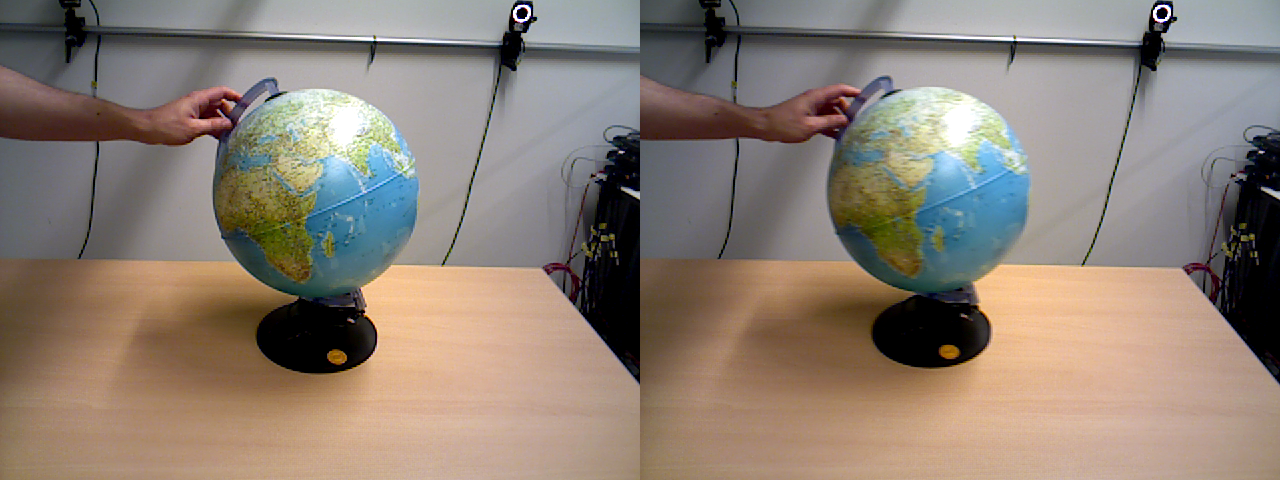

In [3]:
from ml4a import image
from PIL import Image
from ml4a.canvas import canvas
from ml4a.models import flownet

globeimg1 = Image.open('rgb01.png')
globeimg2 = Image.open('rgb02.png')

image.display([globeimg1, globeimg2])

In [4]:
# get flow from img1 to img2
flow = flownet.run(globeimg1, globeimg2) 

# blurring the flow reduces any high-frequency noise in the raw flowmap
flow = flownet.blur(flow, blur_times=10)

Downloading...
From: https://drive.google.com/uc?id=1jbWiY1C_nqAUJRYZu7mwzV6CK7ugsa5v
To: /root/.ml4a/FlowNetPytorch/flownets_EPE1.951.pth.tar
100%|██████████| 155M/155M [00:01<00:00, 134MB/s]


It's easier to visualize the flowmap if we map it to color. Then we can display it.

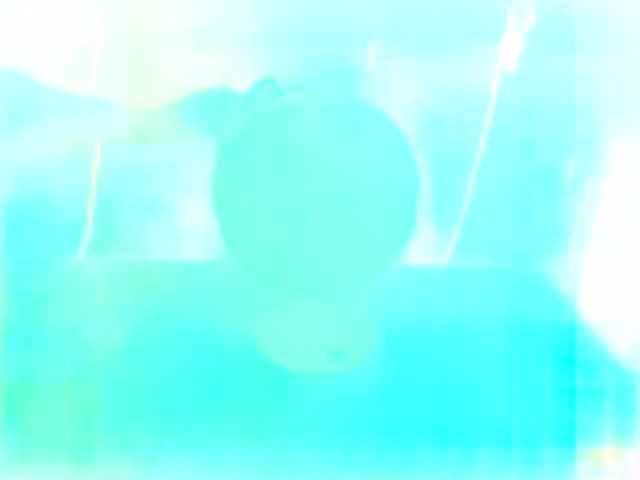

In [5]:
rgb_flow = flownet.run(globeimg1, globeimg2, to_rgb=True) 
image.display(rgb_flow)

One way to see what the optical flow does is to use the flowmap on one of the images to reconstruct the other. We can do that with `canvas.map_image`.

image 2


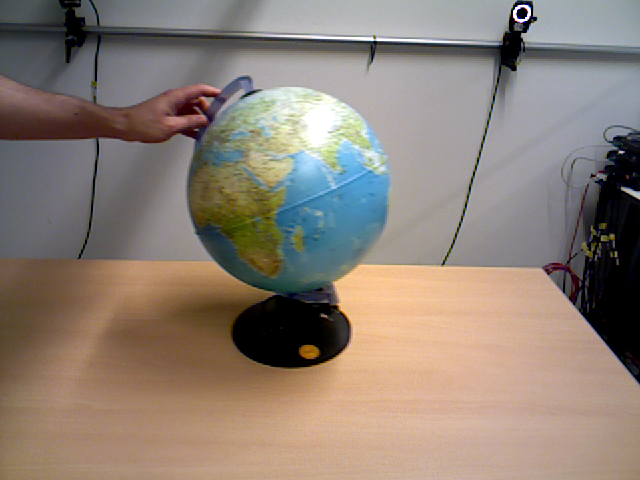

image 2 reconstructed from image 1 + flow


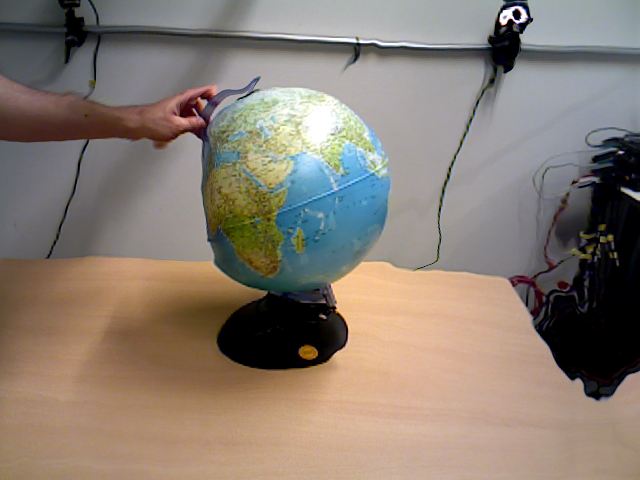

In [6]:
mapping_1to2 = flownet.flow_to_mapping(-flow)
mapping_2to1 = flownet.flow_to_mapping(flow)

globeimg2_reconstructed = canvas.map_image(globeimg1, mapping_1to2)
globeimg1_reconstructed = canvas.map_image(globeimg2, mapping_2to1)

image.display(globeimg2, title="image 2")
image.display(globeimg2_reconstructed, title="image 2 reconstructed from image 1 + flow")

Repeat the steps above for the other two pairs of images

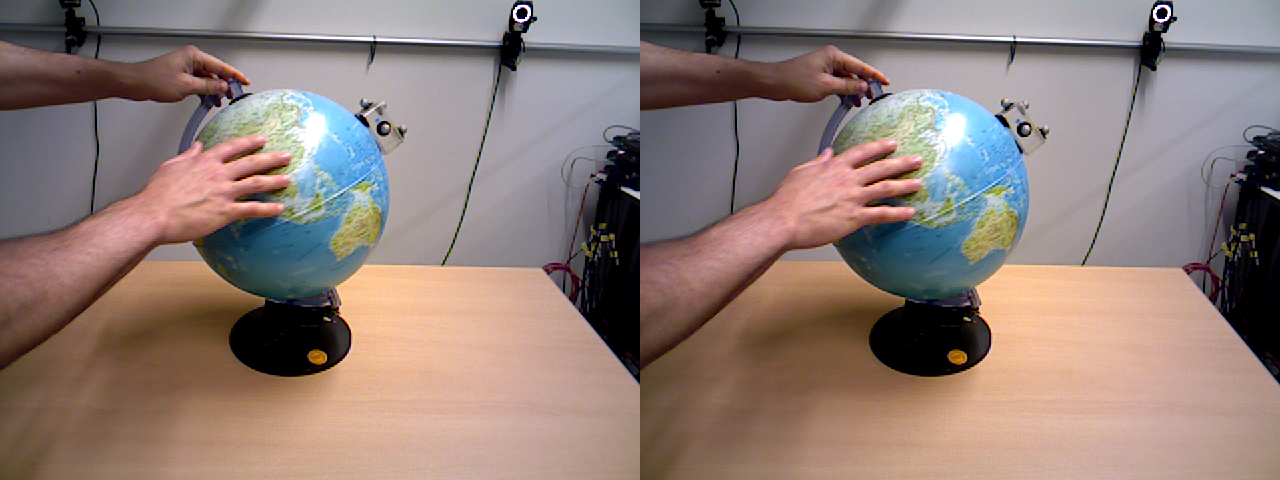

In [7]:
globeimg3 = Image.open('rgb04.png')
globeimg4 = Image.open('rgb06.png')

image.display([globeimg3, globeimg4])

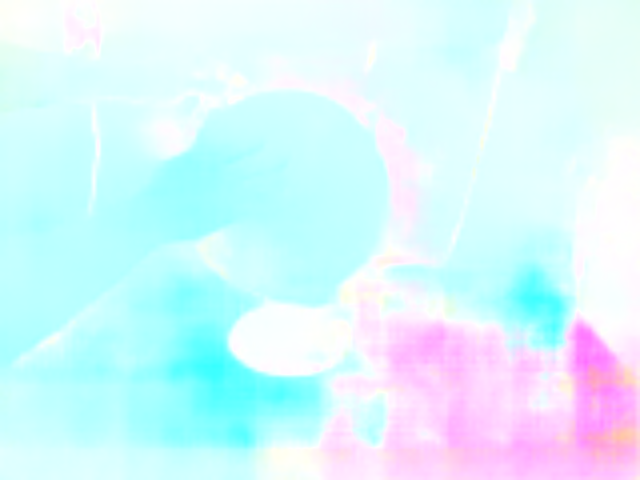

In [8]:
# get flow from img1 to img2
flow = flownet.run(globeimg3, globeimg4) 

# blurring the flow reduces any high-frequency noise in the raw flowmap
flow = flownet.blur(flow, blur_times=2)

rgb_flow = flownet.run(globeimg3, globeimg4, to_rgb=True) 
image.display(rgb_flow)

image 2


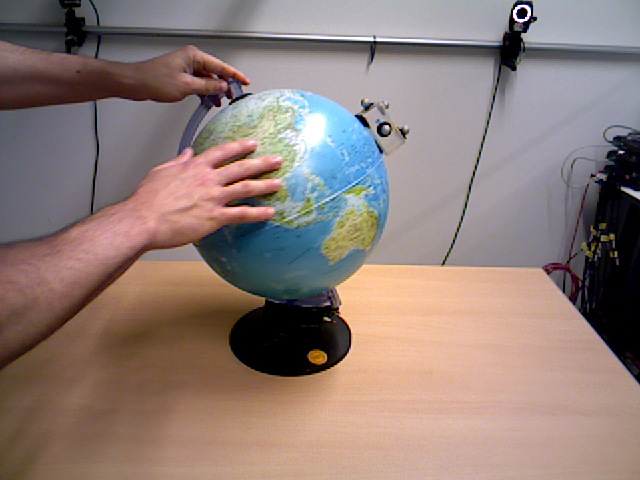

image 2 reconstructed from image 1 + flow


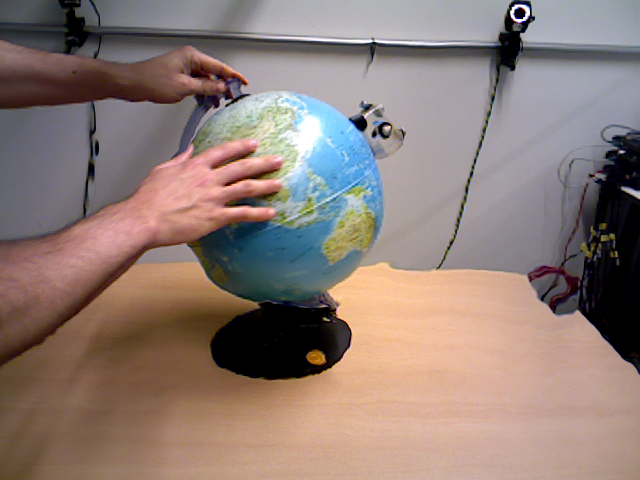

In [9]:
mapping_1to2 = flownet.flow_to_mapping(-flow)
mapping_2to1 = flownet.flow_to_mapping(flow)

globeimg4_reconstructed = canvas.map_image(globeimg3, mapping_1to2)
globeimg3_reconstructed = canvas.map_image(globeimg4, mapping_2to1)

image.display(globeimg4, title="image 2")
image.display(globeimg4_reconstructed, title="image 2 reconstructed from image 1 + flow")

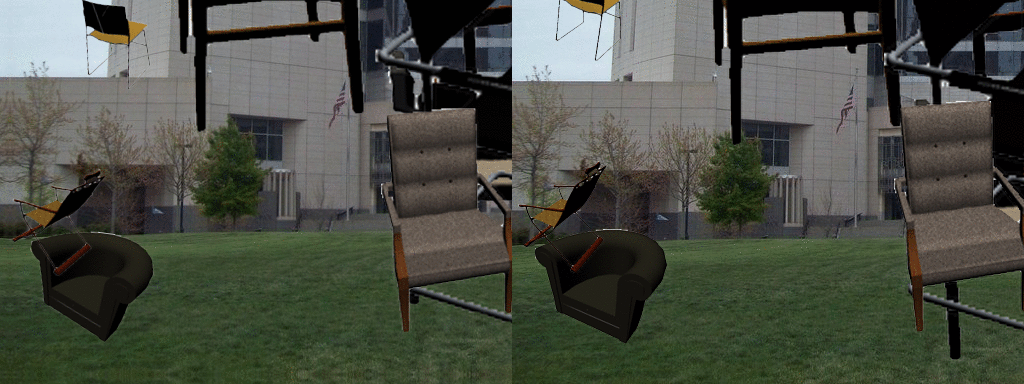

In [10]:
chairimg1 = Image.open('frame_1_chairs.png').convert('RGB')
chairimg2 = Image.open('frame_2_chairs.png').convert('RGB')

image.display([chairimg1, chairimg2])

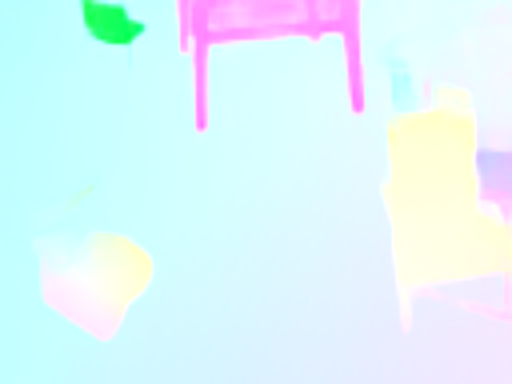

In [11]:
# get flow from img1 to img2
flow = flownet.run(chairimg1, chairimg2) 

# blurring the flow reduces any high-frequency noise in the raw flowmap
flow = flownet.blur(flow, blur_times=10)

rgb_flow = flownet.run(chairimg1, chairimg2, to_rgb=True) 
image.display(rgb_flow)

image 2


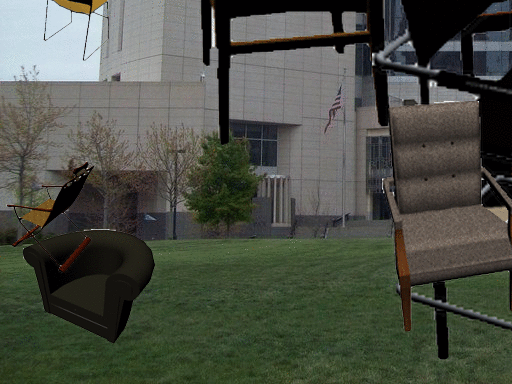

image 2 reconstructed from image 1 + flow


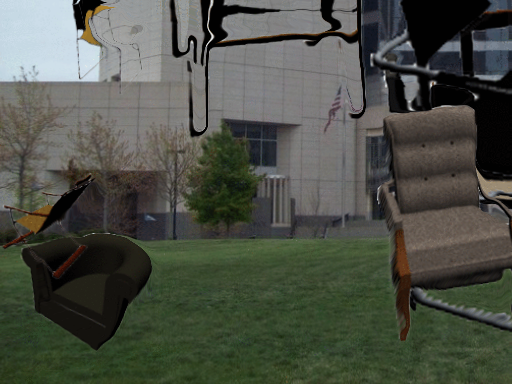

In [12]:
mapping_1to2 = flownet.flow_to_mapping(-flow)
mapping_2to1 = flownet.flow_to_mapping(flow)

chairimg2_reconstructed = canvas.map_image(chairimg1, mapping_1to2)
chairimg1_reconstructed = canvas.map_image(chairimg2, mapping_2to1)

image.display(chairimg2, title="image 2")
image.display(chairimg2_reconstructed, title="image 2 reconstructed from image 1 + flow")


That's it! Just download these images to include in your report, and compare to the results from the previous part.

Credit: this notebook is dervied from [this one](https://colab.research.google.com/github/ml4a/ml4a/blob/master/examples/models/FlowNetPytorch.ipynb)